# Exploring simulated data generated with simtel array

Here we will explore the structure of CTA Event files. We will use `h5py` to look at the directory structure and `ctapipe.io.EventSource` to load the same file for future analysis.\
For a complete description of the dataset used here, refer [CTAO Monte Carlo Simulations - Eventlists on DL2 data level - prod5](https://zenodo.org/records/7298569?)

We will use the publicly available simulations from CTAO

In [57]:
import numpy as np
import ctapipe
from ctapipe.io import EventSource
import h5py
from pprint import pprint
import matplotlib.pyplot as plt
from ctapipe.utils.datasets import get_dataset_path

#input_file = get_dataset_path("gamma_prod5.simtel.zst")
input_file = (
    "gamma-diffuse_with_images_00.dl2.h5"
)

In [58]:
with h5py.File(input_file, "r") as f:
    f.visit(print)
f.close()

configuration
configuration/instrument
configuration/instrument/subarray
configuration/instrument/subarray/layout
configuration/instrument/telescope
configuration/instrument/telescope/camera
configuration/instrument/telescope/camera/geometry_0
configuration/instrument/telescope/camera/geometry_1
configuration/instrument/telescope/camera/readout_0
configuration/instrument/telescope/camera/readout_1
configuration/instrument/telescope/optics
configuration/observation
configuration/observation/observation_block
configuration/observation/scheduling_block
configuration/simulation
configuration/simulation/run
dl1
dl1/event
dl1/event/subarray
dl1/event/subarray/trigger
dl1/event/telescope
dl1/event/telescope/images
dl1/event/telescope/images/tel_001
dl1/event/telescope/images/tel_002
dl1/event/telescope/images/tel_003
dl1/event/telescope/images/tel_004
dl1/event/telescope/images/tel_005
dl1/event/telescope/images/tel_006
dl1/event/telescope/images/tel_007
dl1/event/telescope/images/tel_008
dl1

#### Directory Structure Summarized
<pre>
configuration/
|--> instrument/
|    |--> subarray/
|    |    |--> layout
|    |--> telescope/
|         |--> camera/
|         |    |--> geometry (0,1)
|         |    |--> readout (0,1)
|         |--> optics
|--> observation/
|    |--> observation_block
|    |--> scheduling_block
|--> simulation/
     |--> run

dl1/
|--> event/
|    |--> subarray/
|    |    |--> trigger
|    |--> telescope/
|         |--> images/
|         |    |--> tel_XXX
|         |--> parameters/
|         |    |--> tel_XXX
|         |--> trigger
|--> monitoring/
|    |--> subarray/
|    |     |--> pointing
|    |--> telescope/
|         |--> pointing/
|              |--> tel_XXX
|--> service/
     |--> image_statistics

dl2/
|--> event/
|    |--> subarray/
|    |    |--> geometry/
|    |         |--> HillasReconstructor
|    |--> telescope/
|         |--> impact/
|              |--> HillasReconstructor/
|                   |--> tel_XXX
|── service/
    |--> tel_event_statistics/
         |--> HillasReconstructor

simulation/
|--> event/
|    |--> subarray/
|    |    |--> shower
|    |--> telescope/
|         |--> images/
|         |    |--> tel_XXX
|         |--> impact/
|         |    |--> tel_XXX
|         |--> parameters/
|              |--> tel_XXX
|── service/
    |--> shower_distribution
</pre>
---

We create an instance of the `ctapipe.io.EventSource` that reads the input file and generate `ArrayEventContainer` instances iterated over each event. 
This is a top level container for all event info. The `EventSource` instance creates an `ArrayEventController` for each event that contains the index, dl1, dl2, simulation and trigger information

In [59]:
source = EventSource(
    input_url=input_file,
    max_events = None 
)

Table /configuration/simulation/run is missing column None for field run_number of container <class 'ctapipe.containers.SimulationConfigContainer'>. It will be skipped.


In [60]:
source

allowed_tels,None,"list of allowed tel_ids, others will be ignored. If None, all telescopes in the input stream will be included (default: None)"
focal_length_choice,FocalLengthKind.EFFECTIVE,"If both nominal and effective focal lengths are available, which one to use for the `~ctapipe.coordinates.CameraFrame` attached to the `~ctapipe.instrument.CameraGeometry` instances in the `~ctapipe.instrument.SubarrayDescription` which will be used in CameraFrame to TelescopeFrame coordinate transforms. The 'nominal' focal length is the one used during the simulation, the 'effective' focal length is computed using specialized ray-tracing from a point light source (default: FocalLengthKind.EFFECTIVE)"
input_url,/home/atreyeesinha/Work/SINP_ctapipe_handson/gamma-diffuse_with_images_00.dl2.h5,Path to the input file containing events. (default: None)
max_events,None,Maximum number of events that will be read from the file (default: None)


Accessing the telescope description: \
The simulation made use of 15 telescopes of the CTA Northern Array consisting of 4 LST Cams and 9 MST Cams

In [61]:
tel_dict = source.subarray.tel
pprint(tel_dict)

{np.int16(1): TelescopeDescription(type='LST', optics_name='LST', camera_name='LSTCam'),
 np.int16(2): TelescopeDescription(type='LST', optics_name='LST', camera_name='LSTCam'),
 np.int16(3): TelescopeDescription(type='LST', optics_name='LST', camera_name='LSTCam'),
 np.int16(4): TelescopeDescription(type='LST', optics_name='LST', camera_name='LSTCam'),
 np.int16(5): TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'),
 np.int16(6): TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'),
 np.int16(7): TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'),
 np.int16(8): TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'),
 np.int16(9): TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'),
 np.int16(10): TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'),
 np.int16(11): TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam')

In [62]:
# Create an iterator for the events in the source
event_iter = iter(source)
event = next(event_iter)

Table /dl1/event/telescope/trigger is missing column event_type for field event_type of container <class 'ctapipe.containers.TelescopeTriggerContainer'>. It will be skipped.
Table /simulation/event/subarray/shower is missing column true_starting_grammage for field starting_grammage of container <class 'ctapipe.containers.SimulatedShowerContainer'>. It will be skipped.
Table /dl2/event/subarray/geometry/HillasReconstructor is missing column HillasReconstructor_ang_distance_uncert for field ang_distance_uncert of container <class 'ctapipe.containers.ReconstructedGeometryContainer'>. It will be skipped.
Table /dl1/event/telescope/parameters/tel_035 is missing column hillas_psi_uncertainty for field psi_uncertainty of container <class 'ctapipe.containers.HillasParametersContainer'>. It will be skipped.
Table /dl1/event/telescope/parameters/tel_035 is missing column hillas_transverse_cog_uncertainty for field transverse_cog_uncertainty of container <class 'ctapipe.containers.HillasParameter

Structure of the `ArrayEventContainer`

In [63]:
event

ctapipe.containers.ArrayEventContainer:
                       index.*: event indexing information with default None
                          r0.*: Raw Data with default None
                          r1.*: R1 Calibrated Data with default None
                         dl0.*: DL0 Data Volume Reduced Data with default None
                         dl1.*: DL1 Calibrated image with default None
                         dl2.*: DL2 reconstruction info with default None
                  simulation.*: Simulated Event Information with default None
                                with type <class
                                'ctapipe.containers.SimulatedEventContainer'>
                     trigger.*: central trigger information with default None
                         count: number of events processed with default 0
                  monitoring.*: container for event-wise monitoring data (MON)
                                with default None
                        muon.*: Container for

In [64]:
event.index

ctapipe.containers.EventIndexContainer:
                        obs_id: Observation Block ID with default
                                18446744073709551615
                      event_id: Array Event ID with default 18446744073709551615

In [65]:
event.r0

ctapipe.containers.R0Container:
                        tel[*]: map of tel_id to R0CameraContainer with default
                                None

In [68]:
event.r0.meta

{}

`dl1` contains the calibrated image and `dl2` has the reconstructed parameters. `simulation` contains the shower simulation parameters
Refer to [ctapipe documentation](https://ctapipe.readthedocs.io/en/latest/user-guide/data_format/index.html) for more details

In [69]:
print(event.dl1)

{'tel': {np.int16(35): {'image': array([-1.4, -1.1, -0.2, ...,  1.3,  1.6, -0.3],
      shape=(1855,), dtype=float32),
                        'image_mask': array([False, False, False, ..., False, False, False], shape=(1855,)),
                        'is_valid': np.True_,
                        'parameters': {'concentration': {'cog': np.float64(0.2270637181737781),
                                                         'core': np.float64(0.2270637181737781),
                                                         'pixel': np.float64(0.17538581853673704)},
                                       'core': {'psi': <Quantity nan deg>},
                                       'hillas': {'fov_lat': <Quantity 2.05479064 deg>,
                                                  'fov_lon': <Quantity 3.2633547 deg>,
                                                  'intensity': np.float64(98.05524969100952),
                                                  'kurtosis': np.float64(1.5651874135696

In [70]:
print(event.simulation)

{'shower': {'alt': <Quantity 78.50238307 deg>,
            'az': <Quantity 17.19268751 deg>,
            'core_x': <Quantity 511.62863159 m>,
            'core_y': <Quantity -295.44650269 m>,
            'energy': <Quantity 19.67578125 TeV>,
            'h_first_int': <Quantity 19403.3046875 m>,
            'shower_primary_id': np.int64(0),
            'starting_grammage': None,
            'x_max': <Quantity 473.64755249 g / cm2>},
 'tel': {np.int16(35): {'impact': {'distance': <Quantity 492.57461588 m>,
                                   'distance_uncert': <Quantity 0. m>},
                        'true_image': array([1, 1, 0, ..., 0, 0, 0], shape=(1855,), dtype=int32),
                        'true_image_sum': 801,
                        'true_parameters': {'concentration': {'cog': np.float64(0.019975031210986267),
                                                              'core': np.float64(0.4681647940074906),
                                                              'pixe

The telescope id and the image of the event is accessed through the dl1 sub-container.\
The corresponding telescope geometry is situated in the subarray

#event = next(event_iter)
tel_id = list(event.dl1.tel.keys())[1]
tel_geo = source.subarray.tel[tel_id].camera.geometry
print(tel_geo)
image = event.dl1.tel[tel_id].image

from ctapipe.visualization import CameraDisplay
disp = CameraDisplay(tel_geo)
disp.image = image

(<DataLevel.DL1_IMAGES: 5>, <DataLevel.DL1_PARAMETERS: 6>, <DataLevel.DL2: 7>)

The simulation configuration of all observations can be accessed via `EventSource.simulation_config`

In [12]:
sim_cfg = next(iter(source.simulation_config.values()))
print(sim_cfg)

{'atmosphere': np.int64(99),
 'core_pos_mode': np.int64(1),
 'corsika_bunchsize': np.float64(5.0),
 'corsika_high_E_detail': np.int64(303),
 'corsika_high_E_model': np.int64(3),
 'corsika_iact_options': np.int64(187),
 'corsika_low_E_detail': np.int64(0),
 'corsika_low_E_model': np.int64(2),
 'corsika_version': np.int64(7710),
 'corsika_wlen_max': <Quantity 900. nm>,
 'corsika_wlen_min': <Quantity 240. nm>,
 'detector_prog_id': np.int64(1),
 'detector_prog_start': np.int64(1606278093),
 'diffuse': np.int64(1),
 'energy_range_max': <Quantity 330. TeV>,
 'energy_range_min': <Quantity 0.003 TeV>,
 'max_alt': <Quantity 1.2217305 rad>,
 'max_az': <Quantity -6.770173e-08 rad>,
 'max_scatter_range': <Quantity 1900. m>,
 'max_viewcone_radius': <Quantity 10. deg>,
 'min_alt': <Quantity 1.2217305 rad>,
 'min_az': <Quantity -6.770173e-08 rad>,
 'min_scatter_range': <Quantity 0. m>,
 'min_viewcone_radius': <Quantity 0. deg>,
 'n_showers': np.int64(50000),
 'prod_site_B_declination': <Quantity -0.0

The histograms of the spatial distribution of the shower cores and the energy distribution of the showers can be accessed through `EventSource.simulated_shower_distribution`

In [72]:
obs_id = source.obs_ids[0]

dist = source.simulated_shower_distributions[obs_id]

print(source.simulated_shower_distributions.keys())

dict_keys([np.int32(5712), np.int32(5723), np.int32(5725), np.int32(5726), np.int32(5733), np.int32(5737), np.int32(5740), np.int32(5747), np.int32(5756), np.int32(5762), np.int32(5763), np.int32(5765), np.int32(5766), np.int32(5772), np.int32(5776), np.int32(5778), np.int32(5779), np.int32(5781), np.int32(5782), np.int32(5784), np.int32(5785), np.int32(5786), np.int32(5787), np.int32(5793), np.int32(5794), np.int32(5800), np.int32(5802), np.int32(5805), np.int32(5810), np.int32(5815), np.int32(5817), np.int32(5818), np.int32(5827), np.int32(5829), np.int32(5841), np.int32(5845), np.int32(5846), np.int32(5851), np.int32(5861), np.int32(5863), np.int32(5872), np.int32(5876), np.int32(5877), np.int32(5879), np.int32(5883), np.int32(5887), np.int32(5901), np.int32(5905), np.int32(5906), np.int32(5912)])


In [73]:
source.simulated_shower_distributions

{np.int32(5712): ctapipe.containers.SimulatedShowerDistribution:
                         obs_id: Observation Block ID with default
                                 18446744073709551615
                        hist_id: Histogram ID with default -1
                      n_entries: Number of entries in the histogram with default
                                 -1
                    bins_energy: array of energy bin lower edges, as in
                                 np.histogram with default None [TeV]
                 bins_core_dist: array of core-distance bin lower edges, as in
                                 np.histogram with default None [m]
                      histogram: array of histogram entries, size (n_bins_x,
                                 n_bins_y) with default None,
 np.int32(5723): ctapipe.containers.SimulatedShowerDistribution:
                         obs_id: Observation Block ID with default
                                 18446744073709551615
                     

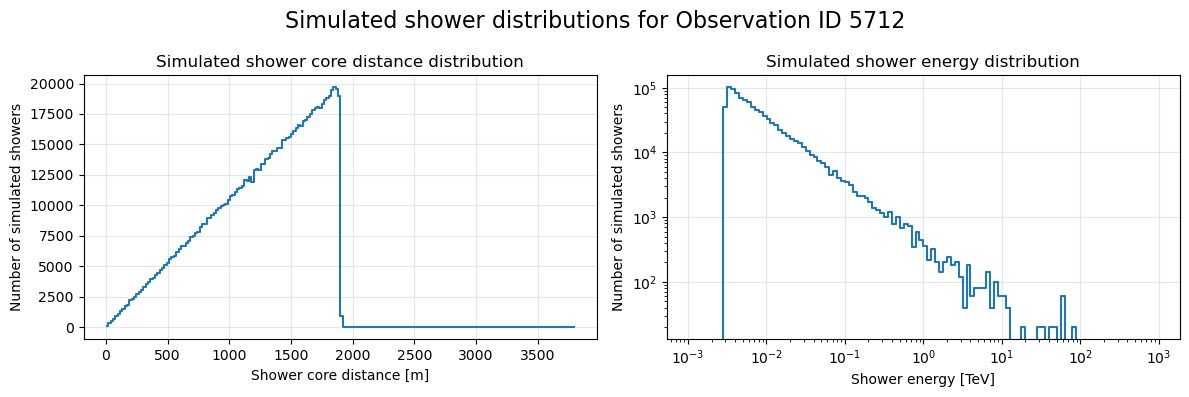

In [14]:

bins_dist = dist["bins_core_dist"]        
bins_e = dist["bins_energy"]      
hist2d = dist["histogram"]             

# Marginalize over energy and distance parameters to get 1D distributions

hist_r = hist2d.sum(axis=0)
hist_e = hist2d.sum(axis=1)

r_edges = bins_dist.to_value()  
r_centers = 0.5 * (r_edges[:-1] + r_edges[1:])
e_centers = 0.5 * (bins_e[:-1] + bins_e[1:])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.suptitle(f"Simulated shower distributions for Observation ID {obs_id}", fontsize=16)
ax[0].step(r_centers, hist_r, where="mid")
ax[0].set_xlabel("Shower core distance [m]")
ax[0].set_ylabel("Number of simulated showers")
ax[0].set_title("Simulated shower core distance distribution")
ax[0].grid(alpha=0.3)



ax[1].step(e_centers, hist_e, where="mid")
ax[1].set_xlabel("Shower energy [TeV]")
ax[1].set_ylabel("Number of simulated showers")
ax[1].set_title("Simulated shower energy distribution")
ax[1].grid(alpha=0.3)
ax[1].set_xscale("log")
ax[1].set_yscale("log")
plt.tight_layout()
plt.show()


In [74]:
dist.n_entries

np.int64(1000000)

In [77]:
dist.hist_id

np.int64(6)